<a href="https://colab.research.google.com/github/amarjit420/Vector_Demos/blob/main/AstraDB_vector_AstraPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Astra DB with AstraPy

AstraPy is a Pythonic SDK for AstraDB

In this demo, you'll create a vector collection, store a few documents on it, and run **vector searches** on it.

#Setup Astra Vector database

Once your database is initialized, go to your database’s Overview screen. Under Database Details > Application Tokens, click Generate Token. In the Application Token dialog, click the clipboard icon to copy the token e.g. `AstraCS:WSnyFUhRxsrg…`​

Make sure to store the token in a secure location before closing the dialog.

Your token is automatically assigned the Database Administrator role.

Copy your database’s API endpoint, located under Database Details > API Endpoint e.g.

`https://<ASTRA_DB_ID>-<ASTRA_DB_REGION>.apps.astra.datastax.com`)



## Setup

In [6]:
!pip install --quiet --upgrade astrapy

### Import needed libraries

In [7]:
import os, json
from getpass import getpass

from astrapy.db import AstraDB

### Provide database credentials

These are the connection parameters on your Astra dashboard. Example values:

- API Endpoint: `https://01234567-89ab-cdef-0123-456789abcdef-us-east1.apps.astra.datastax.com`
- Token: `AstraCS:6gBhNmsk135...`


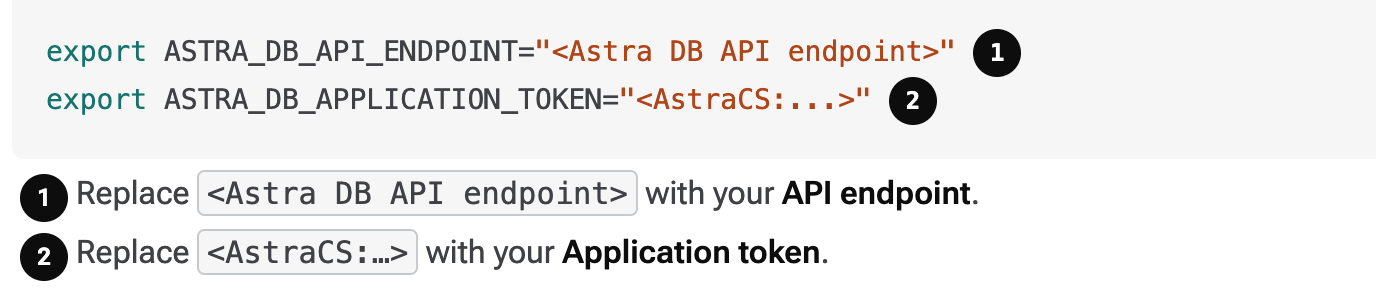


In [8]:
ASTRA_DB_API_ENDPOINT = input("ASTRA_DB_API_ENDPOINT = ")
ASTRA_DB_APPLICATION_TOKEN = getpass("ASTRA_DB_APPLICATION_TOKEN = ")

ASTRA_DB_API_ENDPOINT = https://320f36a5-ad4a-4b65-b61d-54432c7ef3e5-us-east1.apps.astra.datastax.com
ASTRA_DB_APPLICATION_TOKEN = ··········


## Create a collection

### Create the client

In [9]:
astra_db = AstraDB(
    api_endpoint=ASTRA_DB_API_ENDPOINT,
    token=ASTRA_DB_APPLICATION_TOKEN,
)

### Create the collection

The `create_collection` method results in a new collection on your database.

In [10]:
collection = astra_db.create_collection("test_collection", dimension=5)

Here, `dimension` is the vector dimension (or "size", i.e. how many numeric components your vector will have).

We choose a very low number in this example for demonstration purposes, but actual embedding vectors usually are much longer.

_Note:_ In case it exists already and the parameters match, this method does just return the collection -- you will get an error, instead, if you try to create a collection with the same name but a different configuration (such as a mismatching dimension).

## Insert documents

### Insert one document

When working with vector stores, your documents can have arbitrary fields, as long as you use only letters, digits and the `_` (underscore) character, preferrably sticking to `snake_case`, in their name.

In particular, note the reserved dollar sign in the field names `$vector` and `$similarity`.

In [11]:
v_doc1 = {
    "_id": "1",
    "name": "Coded Cleats",
    "description": "ChatGPT integrated sneakers that talk to you",
    "$vector": [0.25, 0.25, 0.25, 0.25, 0.25],
}

response = collection.insert_one(v_doc1)
print(response)

{'status': {'insertedIds': ['1']}}


You can insert documents without any attached vector as well:

In [12]:
non_v_doc1 = {
    "_id": "Cliff1",
    "first_name": "Cliff",
    "last_name": "Wicklow",
}

response = collection.insert_one(non_v_doc1)
print(response)

{'status': {'insertedIds': ['Cliff1']}}


### Insert multiple documents

In [13]:
v_doc_list = [
    {
        "_id": "2",
        "name": "Logic Layers",
        "description": "An AI quilt to help you sleep forever",
        "$vector": [0.45, 0.09, 0.01, 0.2, 0.11],
    },
    {
        "_id": "3",
        "name": "Vision Vector Frame",
        "description": "Vision Vector Frame - An AI display that controls your mood",
        "$vector": [0.1, 0.05, 0.08, 0.3, 0.6],
    },
    {
        "_id": "4",
        "name": "Admirable Artefact",
        "description": "A deep learning device whose exact purpose defies explanation",
        "$vector": [-0.04, 0.17, 0.2, -0.41, 0.11],
    },
    {
        "_id": "4b",
        "name": "Admirable Artefact",
        "description": "A cheap knockoff of the original, and it shows",
        "$vector": [0.12, 0.08, -0.11, 0.32, 0.09],
    },
]

response = collection.insert_many(v_doc_list)
print(response)

{'status': {'insertedIds': ['2', '3', '4', '4b']}}


## Find documents

Find by `_id`:

In [14]:
document = collection.find_one(filter={"_id":"2"})
print(document)

{'data': {'document': {'_id': '2', 'name': 'Logic Layers', 'description': 'An AI quilt to help you sleep forever', '$vector': [0.45, 0.09, 0.01, 0.2, 0.11]}}}


Find by any (non-vector) filter clause:

In [17]:
document = collection.find_one(filter={"name":"Admirable Artefact"})
print(document)

{'data': {'document': {'_id': '4', 'name': 'Admirable Artefact', 'description': 'A deep learning device whose exact purpose defies explanation', '$vector': [-0.04, 0.17, 0.2, -0.41, 0.11]}}}


### Find by vector similarity

By default, the `$similarity` field is returned with each document (note the decreasing order):

In [18]:
query_vector = [0.15, 0.1, 0.1, 0.35, 0.55]

documents = collection.vector_find(query_vector, limit=5)
for document in documents:
    print(f"\n{document}")


{'_id': '3', 'name': 'Vision Vector Frame', 'description': 'Vision Vector Frame - An AI display that controls your mood', '$vector': [0.1, 0.05, 0.08, 0.3, 0.6], '$similarity': 0.99444735}

{'_id': '1', 'name': 'Coded Cleats', 'description': 'ChatGPT integrated sneakers that talk to you', '$vector': [0.25, 0.25, 0.25, 0.25, 0.25], '$similarity': 0.9087937}

{'_id': '4b', 'name': 'Admirable Artefact', 'description': 'A cheap knockoff of the original, and it shows', '$vector': [0.12, 0.08, -0.11, 0.32, 0.09], '$similarity': 0.840839}

{'_id': '2', 'name': 'Logic Layers', 'description': 'An AI quilt to help you sleep forever', '$vector': [0.45, 0.09, 0.01, 0.2, 0.11], '$similarity': 0.7967084}

{'_id': '4', 'name': 'Admirable Artefact', 'description': 'A deep learning device whose exact purpose defies explanation', '$vector': [-0.04, 0.17, 0.2, -0.41, 0.11], '$similarity': 0.4240539}


You can specify which **fields** you'll get back and/or whether you need the **similarity** as well:

In [19]:
documents = collection.vector_find(
    query_vector,
    limit=5,
    fields=["name", "$vector"],  # remember the dollar sign (reserved name)
    include_similarity=False,
)
for document in documents:
    print(f"\n{document}")


{'_id': '3', 'name': 'Vision Vector Frame', '$vector': [0.1, 0.05, 0.08, 0.3, 0.6]}

{'_id': '1', 'name': 'Coded Cleats', '$vector': [0.25, 0.25, 0.25, 0.25, 0.25]}

{'_id': '4b', 'name': 'Admirable Artefact', '$vector': [0.12, 0.08, -0.11, 0.32, 0.09]}

{'_id': '2', 'name': 'Logic Layers', '$vector': [0.45, 0.09, 0.01, 0.2, 0.11]}

{'_id': '4', 'name': 'Admirable Artefact', '$vector': [-0.04, 0.17, 0.2, -0.41, 0.11]}


You can compound with other `filter` clauses, effectively implementing **metadata filtering** on your vector searches:

In [20]:
documents = collection.vector_find(
    query_vector,
    limit=5,
    filter={"name": "Admirable Artefact"},
)
for document in documents:
    print(f"\n{document}")


{'_id': '4b', 'name': 'Admirable Artefact', 'description': 'A cheap knockoff of the original, and it shows', '$vector': [0.12, 0.08, -0.11, 0.32, 0.09], '$similarity': 0.840839}

{'_id': '4', 'name': 'Admirable Artefact', 'description': 'A deep learning device whose exact purpose defies explanation', '$vector': [-0.04, 0.17, 0.2, -0.41, 0.11], '$similarity': 0.4240539}


These options are supported for the `vector_find_one` method as well:

In [21]:
fields = ["description"]

document = collection.vector_find_one(
    query_vector,
    fields=["description"],
    include_similarity=True,  # not really necessary since True is the default
)
print(document)

{'_id': '3', 'description': 'Vision Vector Frame - An AI display that controls your mood', '$similarity': 0.99444735}


### Find-and-update with vector search

In [ ]:
query_vector2 = [0.11, 0.04, -0.02, 0.54, -0.05]
update = {"$set": {"status": "active"}}

collection.vector_find_one_and_update(query_vector2, update=update)

document = collection.find_one(filter={"status": "active"})
print(document)

### Find-and-replace with vector search

Contrary to the above method, this one completely replaces the document. Notice for example that the _description_ field disappears:

In [ ]:
query_vector3 = [0.1, 0.05, 0.08, 0.3, 0.6]
replacement = {
    "_id": "3",
    "name": "Version Victor Fruit",
    "summary": "A special edition of an already awesome gizmo",
    "$vector": [0.2, -0.15, 0.24, 0.02, -0.41],
    "status": "inactive",
}

collection.vector_find_one_and_replace(query_vector3, replacement=replacement)

document = collection.find_one(filter={"_id": "3"})
print(document)

## Delete a collection

In [ ]:
response = astra_db.delete_collection("test_collection")
print(response)